## set correct pkl path below! 

In [7]:
import pickle
import numpy as np
# PASTE THE CORRECT PKL PATH HERE
import os


PKL_FOLDER_PATH = "/Users/diegorivero/Desktop/UROP/Repo/total_data/"
files = [f for f in os.listdir(PKL_FOLDER_PATH)]
PKL_FILES = [PKL_FOLDER_PATH + file for file in files if file[-3:] == "pkl"] 
print(PKL_FILES)
file_dict = {i: os.path.basename(file_path)[:-4] for i, file_path in enumerate(PKL_FILES)}
print(file_dict)

def load_all_pickles(path):
    with open(path, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

def normalize_histograms(entries):
    normalized = []
    for entry in entries:
        hist = entry.get("histogram")
        if hist is not None and not isinstance(hist, np.ndarray):
            entry["histogram"] = np.array(hist)
        normalized.append(entry)
    return normalized

all_data = [list(load_all_pickles(file)) for file in PKL_FILES]
# try:
#     all_objs = list(load_all_pickles(PKL_PATH))
# except FileNotFoundError:
#     raise FileNotFoundError("PKL FILE PATH GIVEN DOESNT EXIST -- double check what path youve set above!")
i = 0
X_list = []
Y_list = []
for all_objs in all_data:
    top_info, *data_entries = all_objs

    print("Top-level info:")
    print(top_info)

    num_captures = len(data_entries)
    print(f"\nNumber of captures (entries): {num_captures}")

    if data_entries:
        data_entries = normalize_histograms(data_entries)
        sample = data_entries[0]

        print("\nFirst sample entry:")
        print(sample)

        hist = sample.get("histogram")
        if hist is not None:
            print(f"Histogram shape: {hist.shape}")

        # ——— Machine‐Learning Dataset Preparation ———

        # We’re now building the core arrays for training a predictive model:
        #  • X (inputs): each row is a 1×m feature vector, where m is the number of histogram bins
        #                  (we’ve averaged out the n channels so that each capture becomes a single vector)
        #  • y (targets): each row is a length-2 vector [x, y] that gives the true position for that capture
        #
        # In supervised learning, we feed X and y into a training algorithm so it can learn
        # how to predict positions from histogram patterns. Once trained, the model takes a new
        # histogram (one row of X) and outputs its best estimate of [x, y].
        #
        hist_list = []
        pos_list = []
        identity_list = []
        for entry in data_entries:
            # average over channels (axis=0) → length-m vector
            hist_list.append(entry["histogram"])

            # collect the ground-truth position for this capture
            p = entry.get("pos", {})
            pos_list.append([p["x"], p["y"]])

            identity_list.append([i])

        X = np.stack(hist_list, axis=0) # shape: (num_captures, m)
        y = np.array(pos_list)     # shape: (num_captures, 2)
        to_add = np.array(identity_list)
        y = np.hstack((y, to_add))

        X_list.append(X)
        Y_list.append(y)
        # ——— Summary ———
        print(f"\nShapes: X → {X.shape}  (n, c, d);  y → {y.shape}  (samples, 2-coord location + identity)")
        print(y[5, :])
        i += 1

X = np.vstack(X_list)
Y = np.vstack(Y_list)

['/Users/diegorivero/Desktop/UROP/Repo/total_data/large_rectangle_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/N_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/circle_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/star_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/triangle_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/L_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/O_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/circle_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/triangle_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/star_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/N_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/O_4inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/L_8inch_data.pkl', '/Users/diegorivero/Desktop/UROP/Repo/total_data/large_P_data.pkl', '/Users/d

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
np.save('X_train', X_train)
np.save('Y_train', Y_train)
np.save('X_test', X_test)
np.save('Y_test', Y_test)

In [9]:
l = np.array([1,2,3])
print(l[:3])
print(l[-3:])
print(l[:2])
print(l[-2:])

[1 2 3]
[1 2 3]
[1 2]
[2 3]


L=128 | best MSE=3.751e-01 | acc=75.94%
L=124 | best MSE=3.994e-01 | acc=76.88%
L=120 | best MSE=3.982e-01 | acc=80.31%
L=116 | best MSE=4.087e-01 | acc=77.19%
L=112 | best MSE=3.729e-01 | acc=78.12%
L=108 | best MSE=4.029e-01 | acc=77.50%
L=104 | best MSE=3.652e-01 | acc=71.88%
L=100 | best MSE=3.706e-01 | acc=80.62%
L= 96 | best MSE=3.504e-01 | acc=85.31%
L= 92 | best MSE=3.210e-01 | acc=86.88%
L= 88 | best MSE=3.125e-01 | acc=88.44%
L= 84 | best MSE=3.762e-01 | acc=80.31%
L= 80 | best MSE=4.535e-01 | acc=78.75%
L= 76 | best MSE=4.615e-01 | acc=78.12%
L= 72 | best MSE=4.700e-01 | acc=75.31%
L= 68 | best MSE=4.675e-01 | acc=73.75%
L= 64 | best MSE=4.778e-01 | acc=73.44%
L= 60 | best MSE=4.666e-01 | acc=73.75%
L= 56 | best MSE=4.810e-01 | acc=70.62%
L= 52 | best MSE=4.775e-01 | acc=76.25%
L= 48 | best MSE=4.864e-01 | acc=70.62%
L= 44 | best MSE=4.862e-01 | acc=69.69%
L= 40 | best MSE=4.890e-01 | acc=74.06%
L= 36 | best MSE=4.901e-01 | acc=67.50%
L= 32 | best MSE=4.876e-01 | acc=68.12%


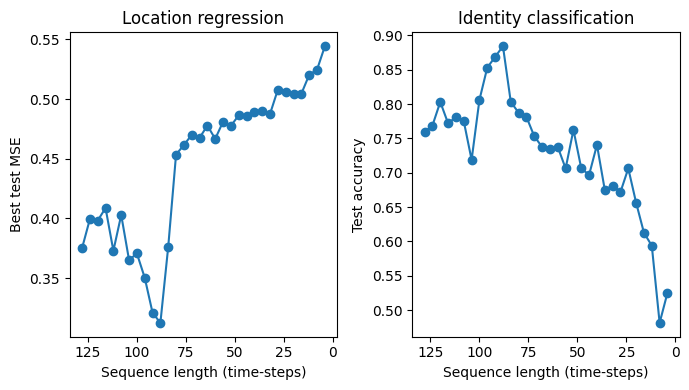

In [10]:
import numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.nn.utils    import clip_grad_norm_
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 0.  helpers (unchanged)
# ---------------------------------------------------------------------
def zscore(x, eps=1e-8):
    m, s = x.mean((0,2), keepdim=True), x.std((0,2), keepdim=True)
    return (x - m) / (s + eps)

def scale_xy(y):
    mins, maxs = y.min(0)[0], y.max(0)[0]
    y = 2*(y - mins)/(maxs - mins) - 1.0
    return y, mins, maxs

def init_weights(m):
    if isinstance(m, (nn.Conv1d, nn.Linear)):
        nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
        nn.init.zeros_(m.bias)

# ---------------------------------------------------------------------
# 1.  outer loop over input lengths
# ---------------------------------------------------------------------
DEVICE  = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
lengths = list(range(128, 3, -4))          # 128, 124, …, 8, 4
all_mse, all_acc = [], []

for L in lengths:
    # ----------------- 1.1  dataset ----------------------------------
    X_trunc = torch.tensor(X[:, :, -L:], dtype=torch.float32)  # (n,9,L)
    X_trunc = zscore(X_trunc)

    loc  = torch.tensor(Y[:, :2], dtype=torch.float32)
    loc, xy_min, xy_max = scale_xy(loc)

    ident= torch.tensor(Y[:,  2].astype(int), dtype=torch.long)

    dataset = TensorDataset(X_trunc, loc, ident)
    train_set, test_set = random_split(
        dataset,
        [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)],
        generator=torch.Generator().manual_seed(0)
    )
    train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
    test_loader  = DataLoader(test_set,  batch_size=128)

    # ----------------- 1.2  nets -------------------------------------
    class ConvRegressor(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Conv1d(9, 64,  5, padding=2), nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Conv1d(64, 128, 5, padding=2), nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Conv1d(128,256, 5, padding=2), nn.ReLU(),
                nn.AdaptiveAvgPool1d(1),
                nn.Flatten(),
                nn.Linear(256,128), nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(128,2)
            )
        def forward(self,x): return self.net(x)

    class ConvClassifier(nn.Module):
        def __init__(self, emb_dim=128):
            super().__init__()
            self.features = nn.Sequential(
                nn.Conv1d(9, 64,5,padding=2), nn.ReLU(),
                nn.Conv1d(64,128,5,padding=2), nn.ReLU(),
                nn.MaxPool1d(2),
                nn.BatchNorm1d(128),
                nn.Conv1d(128,256,5,padding=2), nn.ReLU(),
                nn.Conv1d(256,512,5,padding=2), nn.ReLU(),
                nn.AdaptiveAvgPool1d(1),
                nn.Flatten(),
                nn.Linear(512,emb_dim)
            )
        def forward(self,x):
            z = self.features(x)
            return nn.functional.normalize(z,dim=1)

    reg_net = ConvRegressor().apply(init_weights).to(DEVICE)
    cls_net = ConvClassifier().apply(init_weights).to(DEVICE)

    # ----------------- 1.3  losses, opt, sched ------------------------
    criterion_reg = nn.L1Loss()
    criterion_cls = nn.CosineEmbeddingLoss(margin=0.4)

    opt_reg = optim.AdamW(reg_net.parameters(), lr=3e-4, weight_decay=1e-4)
    opt_cls = optim.AdamW(cls_net.parameters(), lr=1e-4, weight_decay=1e-4)

    sched_reg = CosineAnnealingLR(opt_reg, T_max=150, eta_min=1e-5)
    sched_cls = CosineAnnealingLR(opt_cls, T_max=150, eta_min=1e-5)

    # ----------------- 1.4  train & val -------------------------------
    EPOCHS, patience = 100000, 30
    best_mse, wait   = float('inf'), 0

    for epoch in range(1, EPOCHS+1):

        # ---- train ----
        reg_net.train(); cls_net.train()
        for xb, y_loc, y_id in train_loader:
            xb, y_loc, y_id = xb.to(DEVICE), y_loc.to(DEVICE), y_id.to(DEVICE)

            # regression ------------------------------------------------
            opt_reg.zero_grad()
            loss_r = criterion_reg(reg_net(xb), y_loc)
            loss_r.backward()
            clip_grad_norm_(reg_net.parameters(), 5)
            opt_reg.step()

            # classification -------------------------------------------
            opt_cls.zero_grad()
            emb       = cls_net(xb)
            perm      = torch.randperm(xb.size(0), device=DEVICE)
            emb_shuf  = emb[perm]
            same      = (y_id == y_id[perm]).float()*2 - 1
            loss_c    = criterion_cls(emb, emb_shuf, same)
            loss_c.backward()
            clip_grad_norm_(cls_net.parameters(), 5)
            opt_cls.step()

        sched_reg.step(); sched_cls.step()

        # ---- validate ----
        reg_net.eval(); cls_net.eval()
        with torch.no_grad():
            # fit linear probe on train embeddings ---------------------
            Z_tr, Y_tr = [], []
            for xb, _, y_id in train_loader:
                Z_tr.append(cls_net(xb.to(DEVICE)).cpu())
                Y_tr.append(y_id.cpu())
            Z_tr = torch.cat(Z_tr)
            Y_tr = torch.cat(Y_tr)
            C    = int(Y_tr.max()) + 1
            one_hot = torch.nn.functional.one_hot(Y_tr, C).float()
            W, *_ = torch.linalg.lstsq(Z_tr, one_hot)   # (emb_dim, C)

            # evaluate on test split ----------------------------------
            mse, correct, n = 0.0, 0, 0
            for xb, y_loc, y_id in test_loader:
                xb, y_loc = xb.to(DEVICE), y_loc.to(DEVICE)
                mse += criterion_reg(reg_net(xb), y_loc).item() * xb.size(0)

                emb    = cls_net(xb).cpu()
                logits = emb @ W
                preds  = logits.argmax(1)
                correct += (preds == y_id).sum().item()
                n += xb.size(0)

        mse /= n; acc = correct / n

        # early-stopping bookkeeping ----------------------------------
        if mse < best_mse: best_mse, wait = mse, 0
        else:              wait += 1
        if wait >= patience:
            break

    # end epoch loop ----------------------------------------------------
    all_mse.append(best_mse)
    all_acc.append(acc)
    print(f"L={L:3d} | best MSE={best_mse:.3e} | acc={acc:6.2%}")

# ---------------------------------------------------------------------
# 2.  plot curves
# ---------------------------------------------------------------------
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.plot(lengths, all_mse, marker='o')
plt.gca().invert_xaxis()
plt.xlabel("Sequence length (time-steps)")
plt.ylabel("Best test MSE")
plt.title("Location regression")

plt.subplot(1,2,2)
plt.plot(lengths, all_acc, marker='o')
plt.gca().invert_xaxis()
plt.xlabel("Sequence length (time-steps)")
plt.ylabel("Test accuracy")
plt.title("Identity classification")

plt.tight_layout()
plt.show()


MLP (with tSNE visualization of last layer of both objects and locations)
Try out contrastive loss for classification and regression




Epoch   1 | MSE=5.561e-01 | acc=79.69%
Epoch  20 | MSE=5.960e-01 | acc=74.69%
Epoch  40 | MSE=5.883e-01 | acc=70.00%
Epoch  60 | MSE=5.550e-01 | acc=74.06%
Epoch  80 | MSE=4.714e-01 | acc=73.75%
Epoch 100 | MSE=4.584e-01 | acc=74.06%
Epoch 120 | MSE=4.402e-01 | acc=76.25%
Epoch 140 | MSE=4.349e-01 | acc=75.31%
Epoch 160 | MSE=4.333e-01 | acc=76.88%
Epoch 180 | MSE=4.310e-01 | acc=76.88%
Epoch 200 | MSE=4.507e-01 | acc=75.31%
Epoch 220 | MSE=4.441e-01 | acc=76.25%
Epoch 240 | MSE=4.274e-01 | acc=74.69%
Epoch 260 | MSE=4.434e-01 | acc=76.56%
Epoch 280 | MSE=5.621e-01 | acc=76.56%
Epoch 300 | MSE=4.033e-01 | acc=78.12%
Epoch 320 | MSE=4.298e-01 | acc=76.56%
Epoch 340 | MSE=4.214e-01 | acc=75.31%
Epoch 360 | MSE=3.976e-01 | acc=78.12%
Epoch 380 | MSE=3.744e-01 | acc=77.19%
Epoch 400 | MSE=3.636e-01 | acc=75.62%
Epoch 420 | MSE=3.582e-01 | acc=77.19%
Epoch 440 | MSE=3.574e-01 | acc=76.25%
Epoch 460 | MSE=3.538e-01 | acc=77.81%
Epoch 480 | MSE=3.580e-01 | acc=79.38%
↳ early stop @ epoch 490


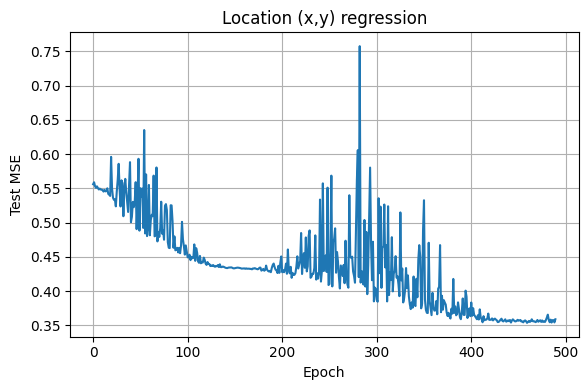

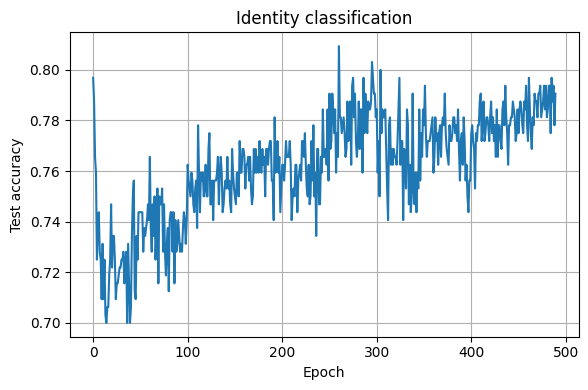

In [11]:
import numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.nn.utils import clip_grad_norm_
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# ------------------------- 0.  helpers ------------------------------- #
def zscore(x, eps=1e-8):
    m, s = x.mean((0,2), keepdim=True), x.std((0,2), keepdim=True)
    return (x - m) / (s + eps)

def scale_xy(y):
    mins, maxs = y.min(0)[0], y.max(0)[0]
    y = 2*(y - mins)/(maxs - mins) - 1.0               # → –1 … 1
    return y, mins, maxs

def init_weights(m):
    if isinstance(m, (nn.Conv1d, nn.Linear)):
        nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
        nn.init.zeros_(m.bias)

# ------------------------- 1.  data ---------------------------------- #
X_t  = torch.tensor(X, dtype=torch.float32)             # (n,9,128)
X_t  = zscore(X_t)                                      # (A)

loc  = torch.tensor(Y[:, :2], dtype=torch.float32)
loc, xy_min, xy_max = scale_xy(loc)                     # (A)

ident= torch.tensor(Y[:,  2].astype(int), dtype=torch.long)
dataset = TensorDataset(X_t, loc, ident)
train_set, test_set = random_split(dataset, [int(len(dataset)*0.8),
                                             int(len(dataset)*0.2)],
                                   generator=torch.Generator().manual_seed(0))

train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_set,  batch_size=128)

DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# ------------------------- 2.  nets  --------------------------------- #
class ConvRegressor(nn.Module):
    """Powerful 1-D CNN + FC for (x,y) localisation."""
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(      # (n, 9, 128)
            nn.Conv1d(9, 64,  kernel_size=5, padding=2), nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Conv1d(64, 128, kernel_size=5, padding=2), nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Conv1d(128, 256, kernel_size=5, padding=2), nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),    # → (n, 256, 1)
            nn.Flatten(),               # → (n, 256)
            nn.Linear(256, 128), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 2)           # (x,y)
        )
    def forward(self, x):               # x: (n, 9, 128)
        return self.net(x)

class ConvClassifier(nn.Module):
    """CNN that outputs a 128-D embedding suitable for contrastive learning."""
    def __init__(self, emb_dim: int = 128):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(9, 64, 5, padding=2),  nn.ReLU(),
            nn.Conv1d(64, 128, 5, padding=2), nn.ReLU(),
            nn.MaxPool1d(2),                  # 128 → 64
            nn.BatchNorm1d(128),
            nn.Conv1d(128, 256, 5, padding=2), nn.ReLU(),
            nn.Conv1d(256, 512, 5, padding=2), nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),          # (n,512,1)
            nn.Flatten(),                     # (n,512)
            nn.Linear(512, emb_dim)           # (n,128)
        )

    def forward(self, x):
        z = self.features(x)                  # (n,128)
        z = nn.functional.normalize(z, dim=1) # unit-norm → cosine sim = dot prod.
        return z


reg_net = ConvRegressor().apply(init_weights).to(DEVICE)   # (B)
cls_net = ConvClassifier().apply(init_weights).to(DEVICE)  # (B)

# --- losses ----------------------------------------------------------
criterion_reg = nn.L1Loss()                 # ← was nn.MSELoss()
criterion_cls = nn.CosineEmbeddingLoss(margin=0.4)   # ← replaces CrossEntropy

opt_reg = optim.AdamW(reg_net.parameters(), lr=3e-4, weight_decay=1e-4)
opt_cls = optim.AdamW(cls_net.parameters(), lr=1e-4, weight_decay=1e-4)

sched_reg = CosineAnnealingLR(opt_reg, T_max=150, eta_min=1e-5)  # (D)
sched_cls = CosineAnnealingLR(opt_cls, T_max=150, eta_min=1e-5)

# ------------------------- 3.  train --------------------------------- #
EPOCHS, patience = 100000, 30
best_mse, best_acc, wait = float("inf"), 0, 0
hist_mse, hist_acc = [], []

for epoch in range(1, EPOCHS+1):

    # ---- train ----
    reg_net.train(); cls_net.train()
    for xb, y_loc, y_id in train_loader:
        xb, y_loc, y_id = xb.to(DEVICE), y_loc.to(DEVICE), y_id.to(DEVICE)

        # regression
        opt_reg.zero_grad()
        loss_r = criterion_reg(reg_net(xb), y_loc)
        loss_r.backward()
        clip_grad_norm_(reg_net.parameters(), 5)        # (C)
        opt_reg.step()

        # classification
        opt_cls.zero_grad()

        emb = cls_net(xb)                # (B,128)

        # form a shuffled view of the same batch
        perm      = torch.randperm(xb.size(0), device=DEVICE)
        emb_shuf  = emb[perm]            # (B,128)
        same      = (y_id == y_id[perm]).float()   # 1 = same identity, 0 = diff
        same      = same * 2 - 1         # convert to +1 / –1 for CosineEmbedding

        loss_c = criterion_cls(emb, emb_shuf, same)
        loss_c.backward()
        clip_grad_norm_(cls_net.parameters(), 5)
        opt_cls.step()

    sched_reg.step(); sched_cls.step()                  # (D)

    # ---- val ----
    reg_net.eval(); cls_net.eval()
    with torch.no_grad():

        # 1️⃣  -------- linear probe (fit on *train* embeddings) -------
        Z_tr, Y_tr = [], []
        for xb, _, y_id in train_loader:          # ignore y_loc here
            Z_tr.append(cls_net(xb.to(DEVICE)).cpu())
            Y_tr.append(y_id.cpu())
        Z_tr = torch.cat(Z_tr)                    # (N_tr, d)
        Y_tr = torch.cat(Y_tr)                    # (N_tr,)
        C     = int(Y_tr.max()) + 1               # number of classes
        d     = Z_tr.shape[1]

        one_hot = torch.nn.functional.one_hot(Y_tr, C).float()
        # least-squares:   W = argmin ||Z W - one_hot||²
        W, *_ = torch.linalg.lstsq(Z_tr, one_hot)  # (d, C)

        # 2️⃣  -------- evaluate on *test* split -----------------------
        mse, correct, n = 0.0, 0, 0
        for xb, y_loc, y_id in test_loader:
            xb, y_loc = xb.to(DEVICE), y_loc.to(DEVICE)
            # regression error
            mse += criterion_reg(reg_net(xb), y_loc).item() * xb.size(0)

            # classification via linear probe
            emb    = cls_net(xb).cpu()            # (B, d)
            logits = emb @ W                      # (B, C)
            preds  = logits.argmax(1)
            correct += (preds == y_id).sum().item()
            n += xb.size(0)

    mse, acc = mse / n, correct / n
    hist_mse.append(mse); hist_acc.append(acc)

    # early-stop bookkeeping ------------------------------------------ #
    if mse < best_mse: best_mse, wait = mse, 0
    else:              wait += 1
    if wait >= patience:
        print(f"↳ early stop @ epoch {epoch}")
        break

    if epoch % 20 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d} | MSE={mse:.3e} | acc={acc:6.2%}")




# ---------------------------------------------------------------------
# 5.  Plots
# ---------------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(hist_mse)
plt.xlabel("Epoch"); plt.ylabel("Test MSE")
plt.title("Location (x,y) regression")
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6,4))
plt.plot(hist_acc)
plt.xlabel("Epoch"); plt.ylabel("Test accuracy")
plt.title("Identity classification")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
def plot_actual_vs_predicted(actual: torch.Tensor, predicted: torch.Tensor):

    if actual.shape != predicted.shape or actual.shape[1] != 2:
        raise ValueError("Both tensors must have shape (n, 2)")

    plt.figure(figsize=(8, 6))

    plt.scatter(actual[:, 0], actual[:, 1], color='blue', label='Actual', marker='o', alpha=0.7)
    plt.scatter(predicted[:, 0], predicted[:, 1], color='red', label='Predicted', marker='x', alpha=0.7)

    for i in range(actual.shape[0]):
        plt.plot([actual[i, 0], predicted[i, 0]], [actual[i, 1], predicted[i, 1]], 'gray', linestyle='--', alpha=0.5)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Actual vs. Predicted Points')
    plt.legend()
    plt.grid(True)
    plt.show()

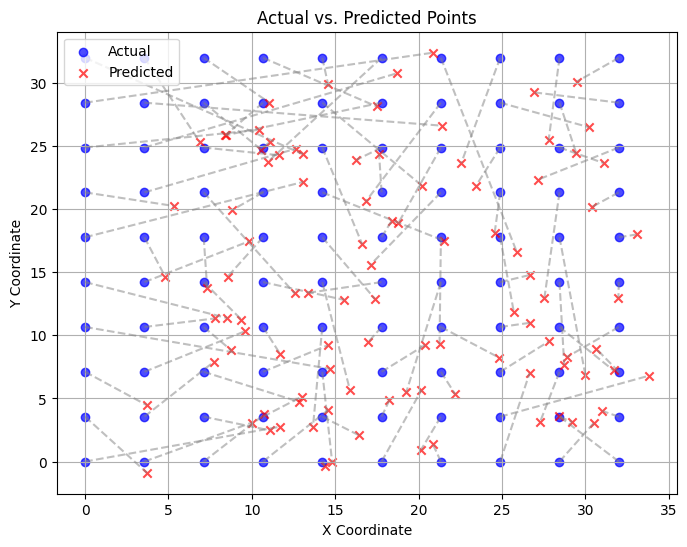

In [13]:
reg_net.eval()                              # inference mode – turns off dropout/BN update
with torch.no_grad():
    X_t = torch.from_numpy(X).float()       # (n, 9, 128) – still on CPU
    X_t = zscore(X_t)                       # use SAME preprocessing as training
    X_t = X_t.to(DEVICE)                    # <-- move to the model’s device

    Y_preds = reg_net(X_t)                  # (n, 2) on DEVICE
    Y_preds = Y_preds.cpu()                 # bring back to CPU for plotting

def unscale_xy(y_scaled, xy_min, xy_max):
    return 0.5*(y_scaled + 1)*(xy_max - xy_min) + xy_min       # back to original range

Y_preds_raw = unscale_xy(Y_preds, xy_min, xy_max)
Y_true_raw  = unscale_xy(loc, xy_min, xy_max)

plot_actual_vs_predicted(Y_true_raw[:100, :], Y_preds_raw[:100, :])


In [14]:
import torch
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

def plot_logits_tsne_interactive(model: torch.nn.Module,
                                 X_np: np.ndarray,
                                 Y_np: np.ndarray,
                                 device: torch.device | None = None,
                                 perplexity: int = 40,
                                 random_state: int = 0,
                                 class_names: dict | list | tuple | None = None,
                                 save_path: str | None = None):

    """
    Interactive t-SNE visualisation of ConvClassifier logits using Plotly.

    Parameters
    ----------
    *model*        : trained ConvClassifier
    *X_np*         : (n, 9, 128)  raw signals (NumPy)
    *Y_np*         : (n, ≥3)      col-2 = class id 0-11
    *device*       : torch.device or None → auto
    *perplexity*   : t-SNE perplexity
    *random_state* : t-SNE seed
    *class_names*  : dict {int:name}  **OR** list/tuple of length 12
    """
    # ---------------- device & preprocessing -----------------------------
    if device is None:
        device = next(model.parameters()).device

    X_t = torch.tensor(X_np, dtype=torch.float32)
    X_t = zscore(X_t)                     # <-- your helper
    X_t = X_t.to(device)

    # ---------------- forward pass ---------------------------------------
    model.eval()
    with torch.no_grad():
        logits = model(X_t).cpu().numpy()     # (n, 12)

    # ---------------- t-SNE ----------------------------------------------
    emb = TSNE(
        n_components=2,
        perplexity=perplexity,
        init="pca",
        learning_rate="auto",
        random_state=random_state,
        n_iter=2000
    ).fit_transform(logits)                   # (n, 2)

    # ---------------- labels ---------------------------------------------
    ids = Y_np[:, 2].astype(int)
    if class_names is None:
        labels = [f"class {k}" for k in ids]
    elif isinstance(class_names, (list, tuple)):
        labels = [class_names[k] for k in ids]
    else:  # dict
        labels = [class_names.get(k, f"class {k}") for k in ids]

    # ---------------- dataframe for Plotly -------------------------------
    df = pd.DataFrame({
        "tsne-1": emb[:, 0],
        "tsne-2": emb[:, 1],
        "identity": labels,
        "id_num": ids
    })

    # ---------------- interactive scatter --------------------------------
    fig = px.scatter(
        df,
        x="tsne-1",
        y="tsne-2",
        color="identity",
        hover_data={"id_num": True},
        title="t-SNE of ConvClassifier logits",
        width=800,
        height=650,
    )
    fig.update_layout(legend_title_text="Identity")
    if save_path:
        fig.write_html(save_path, include_plotlyjs="cdn")
    fig.show()


In [15]:
import torch, numpy as np, pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

@torch.inference_mode()
def evaluate_contrastive_model(
    model: torch.nn.Module,
    train_loader,        # iterable of (xb, …, y_id)
    test_loader,
    class_names=None,    # dict | list | tuple mapping ids → names
    device: torch.device | None = None,
    tsne_perplexity: int = 40,
    random_state: int = 0,
    save_path: str | None = None,      # HTML file to save the plot
):
    """
    Fits a linear probe on top of *model*, reports top-1 accuracy on the
    test set, **and shows an interactive Plotly t-SNE** of train+test
    embeddings.  
    Colours = class, marker shape = split (train ⭘ / test ✕).

    Returns
    -------
    acc : float
        Top-1 accuracy on `test_loader`.
    """
    # ---------------- device -------------------------------------------
    if device is None:
        device = next(model.parameters()).device

    # ---------------- collect embeddings -------------------------------
    def _pass(loader):
        z_list, y_list = [], []
        for xb, _, y_id in loader:          # xb, …, y_id
            xb = xb.to(device)
            z_list.append(model(xb).cpu())
            y_list.append(y_id.cpu())
        return torch.cat(z_list), torch.cat(y_list)

    model.eval()
    Z_tr, Y_tr = _pass(train_loader)        # (N_tr, d)
    Z_te, Y_te = _pass(test_loader)
    n_classes  = int(torch.cat([Y_tr, Y_te]).max()) + 1

    # ---------------- closed-form linear probe -------------------------
    one_hot_tr = torch.nn.functional.one_hot(Y_tr, n_classes).float()
    W, *_      = torch.linalg.lstsq(Z_tr, one_hot_tr)   # (d, C)
    preds_te   = (Z_te @ W).argmax(1)
    acc        = (preds_te == Y_te).float().mean().item()

    # ---------------- t-SNE on *combined* embeddings -------------------
    Z_comb = torch.cat([Z_tr, Z_te]).numpy()
    Y_comb = torch.cat([Y_tr, Y_te]).numpy()
    split  = np.concatenate([np.zeros(len(Z_tr), bool),
                             np.ones (len(Z_te), bool)])  # False=train

    emb2d = TSNE(
        n_components=2,
        perplexity=tsne_perplexity,
        random_state=random_state,
        init="pca",
        learning_rate="auto",
    ).fit_transform(Z_comb)

    # --------------- labels & dataframe for Plotly ---------------------
    if class_names is None:
        identity_lbls = [f"class {k}" for k in Y_comb]
    elif isinstance(class_names, (list, tuple)):
        identity_lbls = [class_names[k] for k in Y_comb]
    else:                                   # dict
        identity_lbls = [class_names.get(k, f"class {k}") for k in Y_comb]

    df = pd.DataFrame({
        "tsne-1"   : emb2d[:, 0],
        "tsne-2"   : emb2d[:, 1],
        "identity" : identity_lbls,
        "split"    : np.where(split, "test", "train"),
    })

    # --------------- interactive scatter -------------------------------
    fig = px.scatter(
        df,
        x="tsne-1",
        y="tsne-2",
        color="identity",
        symbol="split",
        symbol_sequence=["circle", "x"],
        hover_data={"split": True},
        width=850,
        height=650,
        title="t-SNE of train / test embeddings",
    )
    fig.update_layout(legend_title_text="Class")

    if save_path:                # saves a self-contained HTML file
        fig.write_html(save_path, include_plotlyjs="cdn")
    fig.show()

    return acc

acc = evaluate_contrastive_model(
    cls_net,
    train_loader,
    test_loader,
    class_names=file_dict,          # ← your dict of class names
    save_path="tsne_embeddings.html"
)
print(f"Linear-probe accuracy: {acc:.2%}")


Linear-probe accuracy: 79.06%


In [16]:
plot_logits_tsne_interactive(cls_net, X_t, Y, device=DEVICE,perplexity=20,class_names=file_dict, save_path="tsne_logits.html")


/var/folders/wn/4nj87rbs0g3dpdktf27qylhr0000gn/T/ipykernel_33843/2427498899.py:33: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [17]:
import numpy as np
import torch
import plotly.express as px
from sklearn.metrics.pairwise import euclidean_distances  # or cosine_distances

def plot_class_distance_matrix(model, X_np, Y_np, class_names: dict, device=None):
    """
    Plots a matrix of average distances between class logits before softmax.
    
    Parameters:
    - model: torch model, classifier returning logits
    - X_np: numpy array of shape (n, 9, 128)
    - Y_np: numpy array of shape (n,) with class IDs
    - class_names: dict[int] → str
    - device: torch.device (optional)
    """
    model.eval()
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Convert inputs
    X_tensor = torch.tensor(X_np, dtype=torch.float32).to(device)
    Y_tensor = torch.tensor(Y_np, dtype=torch.long)

    # Pass through model to get logits
    with torch.no_grad():
        logits = model(X_tensor).cpu().numpy()  # shape (n, num_classes)

    num_classes = len(class_names)
    class_logits = {i: [] for i in range(num_classes)}

    # Collect logits by class
    for i in range(len(Y_tensor)):
        class_logits[int(Y_tensor[i])].append(logits[i])

    # Average logits per class
    avg_logits = np.array([np.mean(class_logits[i], axis=0) for i in range(num_classes)])

    # Compute pairwise distances
    dist_matrix = euclidean_distances(avg_logits)  # or use cosine_distances

    # Label rows/columns
    labels = [class_names[i] for i in range(num_classes)]

    # Plot with Plotly
    fig = px.imshow(dist_matrix,
                    x=labels, y=labels,
                    color_continuous_scale="Viridis",
                    labels={'color': 'Avg Distance'},
                    title="Average Pre-Softmax Logit Distance Between Classes")

    fig.update_layout(width=700, height=700)
    fig.write_html("classification_distances_heatmap.html", include_plotlyjs="cdn")
    fig.show()


plot_class_distance_matrix(cls_net , X_t, ident, file_dict, device=None)

/var/folders/wn/4nj87rbs0g3dpdktf27qylhr0000gn/T/ipykernel_33843/3477943712.py:23: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/wn/4nj87rbs0g3dpdktf27qylhr0000gn/T/ipykernel_33843/3477943712.py:24: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [18]:
import numpy as np
import torch
import plotly.express as px
from scipy.stats import binned_statistic_2d

def plot_regression_error_map(reg_model, X_np, Y_np, class_names=None, bins=30, device=None):
    """
    Plots a 2D matrix of average L2 prediction error per (x,y) region.
    
    Parameters:
    - reg_model : torch.nn.Module
        Regressor that outputs (x, y) coordinates
    - X_np : np.ndarray
        Input features of shape (n, 9, 128)
    - Y_np : np.ndarray
        True (x, y) coordinates of shape (n, 2)
    - class_names : unused (included for API consistency)
    - bins : int
        Number of bins along x and y axis
    - device : torch.device (optional)
    """
    reg_model.eval()
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    reg_model.to(device)

    # Convert inputs
    X_tensor = torch.tensor(X_np, dtype=torch.float32).to(device)

    # Get predictions
    with torch.no_grad():
        preds = reg_model(X_tensor).cpu()#.numpy()
    print(preds[:5,:])
    print(Y_np[:5,:])
    # Compute L2 errors
    errors = np.linalg.norm(preds - Y_np, axis=1)  # (n,)

    # Create 2D bins over (x, y) true coordinates
    x_vals, y_vals = Y_np[:, 0], Y_np[:, 1]

    stat, x_edges, y_edges, _ = binned_statistic_2d(
        x_vals, y_vals, errors, statistic='mean', bins=bins
    )

    # Plot with Plotly
    fig = px.imshow(stat.T,  # transpose so x = horizontal, y = vertical
                    origin='lower',
                    labels={'color': 'Avg L2 Error'},
                    x=np.round((x_edges[:-1] + x_edges[1:]) / 2, 2),
                    y=np.round((y_edges[:-1] + y_edges[1:]) / 2, 2),
                    title="Average L2 Prediction Error per (x,y) Region")
    
    fig.update_layout(
        xaxis_title="x", yaxis_title="y",
        width=700, height=600
    )
    fig.write_html("regression_distances_heatmap.html", include_plotlyjs="cdn")
    fig.show()
plot_regression_error_map(reg_net, X_t, loc, class_names=None)


/var/folders/wn/4nj87rbs0g3dpdktf27qylhr0000gn/T/ipykernel_33843/2743273952.py:28: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



tensor([[-0.2693, -0.8274],
        [-0.7685, -1.0554],
        [-0.7696, -0.7201],
        [-0.0832, -0.5406],
        [-0.4664, -0.2896]])
tensor([[-1.0000, -1.0000],
        [-1.0000, -0.7778],
        [-1.0000, -0.5556],
        [-1.0000, -0.3333],
        [-1.0000, -0.1111]])


pairwise distance in embedding space
modify data to remove the first n bins and check model perforamnce
Create model to predict both at the same 
heat map for distance estimates


parse the accuracy metric